<a href="https://colab.research.google.com/github/Schify/FacExcerciseBook/blob/andras/DL_Big_homework_normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#with this piece of code you can connect your drive with the google collab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#In the github repository we will provide the google drive link to the zip file
#containing the data that we will use. 
#This will unzip it into a train and a val folder
!unzip "gdrive/MyDrive/DL_big_homework/fairface" 

A streamkimeneten csak az utolsó 5000 sor látható.
  inflating: val/5370.jpg            
  inflating: val/5596.jpg            
  inflating: val/5875.jpg            
  inflating: val/5878.jpg            
  inflating: val/5879.jpg            
  inflating: val/5883.jpg            
  inflating: val/6126.jpg            
  inflating: val/6132.jpg            
  inflating: val/6144.jpg            
  inflating: val/6150.jpg            
  inflating: val/6340.jpg            
  inflating: val/7190.jpg            
  inflating: val/7734.jpg            
  inflating: val/7747.jpg            
  inflating: val/7872.jpg            
  inflating: val/7940.jpg            
  inflating: val/8065.jpg            
  inflating: val/8069.jpg            
  inflating: val/8125.jpg            
  inflating: val/8202.jpg            
  inflating: val/8204.jpg            
  inflating: val/8205.jpg            
  inflating: val/8268.jpg            
  inflating: val/8270.jpg            
  inflating: val/8281.jpg            

In [3]:
#loading all the necessary libraries for the project
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import cv2
from tqdm.notebook import tqdm #useful module for progress bars
import logging
import gc
from datetime import datetime
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.image import ImageDataGenerator
from skimage import io

In [4]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdm
from datetime import datetime

%matplotlib inline

In [5]:
!pip install keras_facenet
from tensorflow.keras.utils import CustomObjectScope
from tensorflow.keras.models import load_model

from keras_facenet import FaceNet
embedder = FaceNet()

     |████████████████████████████████| 2.3 MB 5.3 MB/s 
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10386 sha256=935f80cda7d712774d736565f8deea3669bfb62660ec071e0833cbf3ceff8a90
  Stored in directory: /root/.cache/pip/wheels/2b/76/1a/a29ceb07bfca098e2b0bc8690d550753a0384cbed26d5f47ee
Successfully built keras-facenet


In [6]:
#here this is a function for loading the images from a given directory.
def load_all_images(directory, img_size = False, range_from = 0, range_to = 1):
    filenames = os.listdir(directory)
    num = len(filenames)
    resize = True
    if(not img_size):
        img = cv2.imread(os.path.join(directory,filenames[0]))
        img_size = img.shape[0]
        resize = False
    #For memory sizes this big dynamic arrays (lists) are not an effective way to reserve memory
    #Hence numpy arrays are utalized
    print(f"{int(num*(range_to-range_from))} files to be loaded")
    start = int(num*range_from)
    images = np.zeros(shape=(int(num*(range_to-range_from)), img_size, img_size, 3), dtype=np.float16)
    w = 100
    num_none = 0
    for i in tqdm(range(int(images.shape[0]))):
        img = cv2.imread(os.path.join(directory,filenames[i+start]))
        if img is not None:

            if(resize):
                images[i, ...] = cv2.resize(img, (img_size, img_size))
            else:
                images[i, ...] = img
            '''
            w-=1
            if(__debug__ and w==0):
                break
        else:
            num_none +=1
'''
    if(num_none>0):
        print(f"{num_none} images were unable to load, or not valid image types")
    return images

def load_all_images_embedded(directory, range_from = 0, range_to = 1):
    filenames = os.listdir(directory)
    num = len(filenames)
    #For memory sizes this big dynamic arrays (lists) are not an effective way to reserve memory
    #Hence numpy arrays are utalized
    print(f"{int(num*(range_to-range_from))} files to be loaded")
    start = int(num*range_from)
    image_embeddings = np.zeros(shape=(int(num*(range_to-range_from)), 512), dtype=np.float16)
    num_none = 0
    for i in tqdm(range(int(image_embeddings.shape[0]))):
        img_embedding = embedder.extract(directory+"/"+filenames[i+start], threshold=0.95)
        if len(img_embedding)>0:
            image_embeddings[i, :] = img_embedding[0]["embedding"]
        else:
          num_none += 1
    if(num_none>0):
        print(f"{num_none} images were unable to load, or not valid image types")
    return image_embeddings

In [4]:

#Here we used the garbage collector library to collect the pictures into a npz dataformat.
#we are splitting it into multiple batches and making the images 128x128 sizes.
#This way we are reserving memory and it's easier to load this later.
gc.collect()
np.savez("train_128x128_1_of_4.npz", train=load_all_images("train",
img_size=128,
range_from=0,
 range_to=0.25)
 )
gc.collect()
np.savez("train_128x128_2_of_4.npz", train=load_all_images("train",
img_size=128,
range_from=0.25,
 range_to=0.5)
 )
gc.collect()
np.savez("train_128x128_3_of_4.npz", train=load_all_images("train",
img_size=128,
range_from=0.5,
 range_to=0.75)
 )
gc.collect()
np.savez("train_128x128_4_of_4.npz", train=load_all_images("train",
img_size=128,
range_from=0.75,
 range_to=0.95)
 )

gc.collect()
np.savez("test_128x128.npz", train=load_all_images("train",
img_size=128,
range_from=0.95,
 range_to=1)
 )
gc.collect()
np.savez("val_128x128.npz", val=load_all_images("val",
img_size=128)
 )
gc.collect()


21686 files to be loaded


  0%|          | 0/21686 [00:00<?, ?it/s]

21686 files to be loaded


  0%|          | 0/21686 [00:00<?, ?it/s]

21686 files to be loaded


  0%|          | 0/21686 [00:00<?, ?it/s]

17348 files to be loaded


  0%|          | 0/17348 [00:00<?, ?it/s]

4337 files to be loaded


  0%|          | 0/4337 [00:00<?, ?it/s]

10954 files to be loaded


  0%|          | 0/10954 [00:00<?, ?it/s]

In [7]:
np.savez("train_embedding.npz", train=load_all_images_embedded("train", range_to = 0.012))
gc.collect()


1040 files to be loaded


  0%|          | 0/1040 [00:00<?, ?it/s]

81 images were unable to load, or not valid image types
1095 files to be loaded


  0%|          | 0/1095 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [8]:
np.savez("val_embedding.npz", val=load_all_images_embedded("val", range_to = 0.01))
gc.collect()

109 files to be loaded


  0%|          | 0/109 [00:00<?, ?it/s]

12 images were unable to load, or not valid image types


58984

In [5]:
#here we are dispalying the time and loading one of the arrays.
now = datetime.now()
this_data = np.load("train_128x128_1_of_4.npz")["train"]
print(datetime.now()-now)

0:00:25.147212


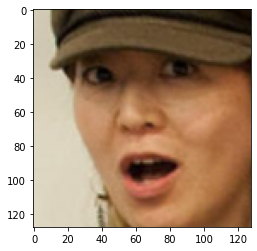

In [6]:
#Here we show one of the images to make sure everything is working
plt.imshow((this_data[10000][:, :, ::-1]).astype(float)/255.0) #for some reason the RGB is reversed
plt.show()

In [9]:
#reading the csv file that contains the labels with pandas
train_label_raw = pd.read_csv("gdrive/MyDrive/DL_big_homework/train.csv")
val_label_raw = pd.read_csv("gdrive/MyDrive/DL_big_homework/val.csv")

In [10]:
#displaying the training labels
train_label_raw.head()

,file,age,gender,race,service_test
0,train/1.jpg,50-59,Male,East Asian,True
1,train/2.jpg,30-39,Female,Indian,False
2,train/3.jpg,3-9,Female,Black,False
3,train/4.jpg,20-29,Female,Indian,True
4,train/5.jpg,20-29,Female,Indian,True


In [11]:
#dispalying the validation labels
val_label_raw.head()

,file,age,gender,race,service_test
0,val/1.jpg,3-9,Male,East Asian,False
1,val/2.jpg,50-59,Female,East Asian,True
2,val/3.jpg,30-39,Male,White,True
3,val/4.jpg,20-29,Female,Latino_Hispanic,True
4,val/5.jpg,20-29,Male,Southeast Asian,False


In [12]:
#Here we used sklearn in order to onehotencode our data thus preparing it for the CNN network
OHEC =OneHotEncoder()
"""
OHEC.fit(X=[["0-2", "Male", "Black", "False"],["3-9", "Female", "Indian", "True"],
["10-19", "Male", "East Asian", "False"],["20-29", "Male", "Southeast Asian", "False"],
["30-39", "Male", "Latino_Hispanic", "False"],["40-49", "Male", "Middle Eastern", "False"],["50-59", "Male", "White", "False"],
["60-69", "Male", "Middel Eastern", "False"],["more than 70", "Male", "White", "False"]])
"""
#The one hot encoder arranges the inputs in alphabetic order
OHEC.fit(val_label_raw[["age", "gender", "race", "service_test"]])
val_label = OHEC.transform(val_label_raw[["age", "gender", "race", "service_test"]]).toarray()
train_label = OHEC.transform(train_label_raw[["age", "gender", "race", "service_test"]]).toarray()
#We are putting thes together inside this npz dataformat
np.savez("labels.npz", train=train_label, val=val_label)

In [13]:
labels=np.load("labels.npz")

In [39]:
train_embeddings = np.load("train_embedding.npz")["train"]
train_labels = np.load("labels.npz")["train"][0:embeddings_train.shape[0]]
print(labels.shape)

(1040, 20)


In [41]:
valid_embeddings = np.load("val_embedding.npz")["val"]
valid_labels = np.load("labels.npz")["val"][0:valid_embeddings.shape[0]]
print(valid_labels.shape)

(109, 20)


In [82]:
inputs = keras.Input(shape=(train_embeddings.shape[1],))
x = keras.layers.Dense(128, activation='sigmoid')(inputs)
x = keras.layers.Dropout(0.1)(x)

x = keras.layers.Dense(128, activation='sigmoid')(x)
x = keras.layers.Dropout(0.1)(x)

x = keras.layers.Dense(64, activation='sigmoid')(x)
x = keras.layers.Dense(64, activation='sigmoid')(x)

#each category needs to have its own softmax activation layer 
xs = [keras.layers.Dense(values.shape[0], activation="softmax")(x) for values in OHEC.categories_]#separate categories
outputs = tf.keras.layers.Concatenate()(xs)

model = keras.Model(inputs = inputs, outputs = outputs, name="OpenFace_extension")

model.summary()

Model: "OpenFace_extension"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 512)]        0           []                               
                                                                                                  
 dense_59 (Dense)               (None, 128)          65664       ['input_15[0][0]']               
                                                                                                  
 dropout_26 (Dropout)           (None, 128)          0           ['dense_59[0][0]']               
                                                                                                  
 dense_60 (Dense)               (None, 128)          16512       ['dropout_26[0][0]']             
                                                                                 

In [91]:
model.compile(
    loss=keras.losses.BinaryCrossentropy(),#every bit needs to converge, maybe weighting is also needed
    optimizer="Adam",
    metrics=["binary_accuracy"],#every bit has to be looked at separately
)

In [92]:
model.fit(train_embeddings,train_labels, validation_data=(valid_embeddings, valid_labels),batch_size = 32,epochs=100)

Epoch 1/100
33/33 [==============================] - 1s 11ms/step - loss: 0.0559 - binary_accuracy: 0.9776 - val_loss: 1.3204 - val_binary_accuracy: 0.7757
Epoch 2/100
33/33 [==============================] - 0s 5ms/step - loss: 0.0541 - binary_accuracy: 0.9794 - val_loss: 1.3085 - val_binary_accuracy: 0.7734
Epoch 3/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0521 - binary_accuracy: 0.9794 - val_loss: 1.3135 - val_binary_accuracy: 0.7748
Epoch 4/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0505 - binary_accuracy: 0.9794 - val_loss: 1.3068 - val_binary_accuracy: 0.7743
Epoch 5/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0526 - binary_accuracy: 0.9792 - val_loss: 1.3175 - val_binary_accuracy: 0.7752
Epoch 6/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0572 - binary_accuracy: 0.9786 - val_loss: 1.3165 - val_binary_accuracy: 0.7711
Epoch 7/100
33/33 [==============================] - 0s 6ms/step - lo

TypeError: ignored

In [93]:
test_embone=embedder.embeddings(this_data[1220:1221, :, :, ::-1]/256)

NameError: ignored

In [ ]:
predictions=model.predict(test_embone)

In [ ]:
print(labels[int(predictions[0][0])])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
label_list=["0-2","10-19","20-29","3-9","30-39","40-49","50-59","60-69",
            "more than 70","Female","Male","Balck","East Asian","Indian",
            "Latino_hispanic","Middle_easern", "Southest Asian","White","False","True"]

In [ ]:
mylist=list(labels[int(predictions[0][0])])

In [ ]:
mylist.index(1)

6

In [ ]:
x=[i for i, x in enumerate(mylist) if x == 1]

In [ ]:
predicted=[]
for i in range(3):
  predicted.append(label_list[x[i]])

Text(0.5, 1.0, "['50-59', 'Male', 'East Asian']")

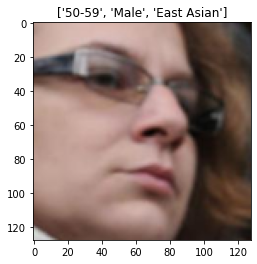

In [ ]:
test_image=this_data[1220][:, :, ::-1].astype(float)/256.0
plt.imshow(test_image)
plt.title(predicted)

In [ ]:
trained_data=this_data[:5000][:, :, ::-1]/255.0
labels = np.load("labels.npz")["train"][0:5000]
validation_data=this_data[1000:1200][:, :, ::-1]/255.0
test_data=this_data[1200:1210][:, :, ::-1]/255.0

In [ ]:
nomralized_data.shape

(1000, 128, 128, 3)

In [81]:
inputs = keras.Input(shape=(128,128,3))
x = keras.layers.Dense(128, activation='sigmoid')(inputs)
x = keras.layers.Dropout(0.1)(x)

x = keras.layers.Dense(128, activation='sigmoid')(x)
x = keras.layers.Dropout(0.1)(x)

x = keras.layers.Dense(64, activation='sigmoid')(x)
x = keras.layers.Dense(64, activation='sigmoid')(x)
xs = [keras.layers.Dense(values.shape[0], activation="softmax")(x) for values in OHEC.categories_]

outputs = tf.keras.layers.Concatenate()(xs)
model = keras.Model(inputs = inputs, outputs = x, name="OpenFace_extension")

model.summary()

Model: "OpenFace_extension"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 dense_51 (Dense)            (None, 128, 128, 128)     512       
                                                                 
 dropout_24 (Dropout)        (None, 128, 128, 128)     0         
                                                                 
 dense_52 (Dense)            (None, 128, 128, 128)     16512     
                                                                 
 dropout_25 (Dropout)        (None, 128, 128, 128)     0         
                                                                 
 dense_53 (Dense)            (None, 128, 128, 64)      8256      
                                                                 
 dense_54 (Dense)            (None, 128, 128, 64

In [ ]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="Adam",
    metrics=["mse"],)

In [ ]:
model.fit(trained_data,labels, validation_data=(validation_data, valid_labels),epochs=3)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
from tensorflow import keras
import numpy as np
!pip install -q -U keras-tuner
import keras_tuner as kt
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
IMAGE_SIZE = [128, 128]
vgg = VGG16(input_shape=(128,128,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
  layer.trainable = False


In [ ]:
x = vgg.output
#x = GlobalAveragePooling2D()(x)

#x= Dropout(0.8)(x)
x = Flatten()(x)

x = Dense(16, activation='relu')(x)

prediction = Dense(20, activation='sigmoid')(x)
model = Model(inputs=vgg.input, outputs=prediction)

NameError: ignored

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(
  loss='categorical_crossentropy',
  optimizer="Adamax",
  metrics=['accuracy']
)

NameError: ignored

In [ ]:
model.fit(trained_data,labels, batch_size=100, validation_data=(validation_data, valid_labels),epochs=3,shuffle=True)

In [ ]:
type(labels)

In [ ]:
asd=OHEC.inverse_transform(labels)

In [ ]:
predictions=model.predict(test_data)

In [ ]:
OHEC.inverse_transform(predictions[:9])

ValueError: ignored